# ***GRAFICA CIRCULAR***

In [24]:
import csv
import pandas as pd
import numpy as np

#Leemos desde el dataset, ya que es una muestra
spam_or_ham = pd.read_csv("spam_spanish.csv", encoding='latin-1')[["label", "text"]]
spam_or_ham.columns = ["label", "text"]
spam_or_ham.head()

#Contando cuántos son Spam y no spam
spam_or_ham["label"].value_counts()

#Con el siguiente método realizamos una optimización. Eliminación de las muestras innecesarias.
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

#Aplicamos el algoritmo de tokenización sobre la muestra con el siguiente código
spam_or_ham.head()["text"].apply(tokenize)

#Vamos a usar la librería scikit-learn a fin de realizar el trabajo pesado del proceso de aprendizaje y de las pruebas. Estamos diciendo qué función tiene que usar para la tokenización y que ésta debe ser binaria, es decir, no importa el número de veces que aparece una palabra, simplemente mirará si aparece o no. Con el siguiente código separamos los datos entre entrenamiento y pruebas.
from sklearn.feature_extraction.text import CountVectorizer
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary = True
)

#La salida de bloque es:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(spam_or_ham["text"], spam_or_ham["label"], stratify=spam_or_ham["label"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

#Nos quedaron 4179 ejemplos para entrenamiento y 1393 ejemplos para pruebas. Creamos un nuevo vectorizador, desde cero, en el que solamente vamos a usar los datos de entrenamiento, no los datos de pruebas.
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

#Creamos el nuevo clasificador y usamos el método fit() para procesar los datos, lo que prepara al clasificador para usarlo más adelante. De nuevo, usamos los datos de entrenamiento para prepararlo, no los de prueba.
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#El clasificador está listo para trabajar con él, pero antes de ello hay que realizar una operación muy interesante que se basa en predecir la precisión de las clasificaciones que conseguirá. Para ello entra en juego otro método importante del clasificador. Se trata del método predict() que permite realizar finalmente las clasificaciones.
#Para calcular la precisión usamos los datos de prueba. La función de scikit-learn llamada accuracy_score() nos sirve para calcular la puntuación de manera sencilla.
from sklearn.metrics import accuracy_score
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")

#Insertamos las frases en un arreglo
frases = [
    '¿Está buscando rediseñar su sitio web con una nueva apariencia moderna?',
  'Por favor envíeme una confirmación de la eliminación completa y permanente de los datos personales',
  'Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio',
  "Nos comunicamos con usted porque el punto final del webhook asociado con su cuenta en modo de prueba ha fallado",
  'Confirma tu cuenta de Facebook en el siguiente enlace',
  'Has sido seleccionado para participar en un servicio gratuito'
]

#Las pasamos por nuestro algoritmo de transformación y vectorización, para finalmente recibir las predicciones de clasificación
frases_X = real_vectorizer.transform(frases)
predicciones = classifier.predict(frases_X)

#Recorremos las predicciones y mostrar lo que el sistema ha sido capaz de interpretar.
for text, label in zip(frases, predicciones):
  print(f"{label:5} - {text}")

Training examples: 219, testing examples 73
Accuracy: 95.8904%
ham   - ¿Está buscando rediseñar su sitio web con una nueva apariencia moderna?
ham   - Por favor envíeme una confirmación de la eliminación completa y permanente de los datos personales
spam  - Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio
ham   - Nos comunicamos con usted porque el punto final del webhook asociado con su cuenta en modo de prueba ha fallado
ham   - Confirma tu cuenta de Facebook en el siguiente enlace
ham   - Has sido seleccionado para participar en un servicio gratuito


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


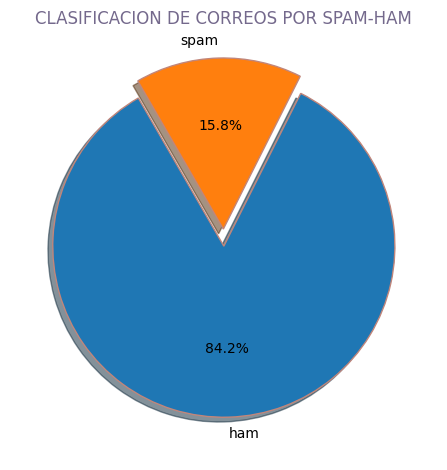

In [26]:
from matplotlib import pyplot as plt
counts= spam_or_ham["label"].value_counts()
explode = [0, 0.1]

plt.pie(counts, labels = counts.index, explode = explode, shadow = True, startangle=120, autopct='%1.1f%%', wedgeprops={'edgecolor':'#c1867b'})

plt.title('CLASIFICACION DE CORREOS POR SPAM-HAM', color = "#74698c")
plt.tight_layout()
plt.show()
